In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mult
import seaborn as sns

# 1. Statical analysis Response Time

In [2]:
myDF=pd.read_csv('./Responsetime.csv',sep=';')

In [3]:
myDF

,Algorithms,Responsetime
0,Algo(WOC),41
1,Algo(WOC),91
2,Algo(WOC),65
3,Algo(WOC),75
4,Algo(WOC),66
5,Algo(WOC),76
6,Algo(WOC),83
7,Algo(WOC),51
8,Algo(WIC),64
9,Algo(WIC),115


# 1.1  Fitting the model

In [4]:
model=ols('Responsetime ~ Algorithms',data=myDF).fit()

# 1.2 Cheaking for the first assumtion of ANOVA test (Normality)

# (i) Q-Q plot  to check normality of residuals

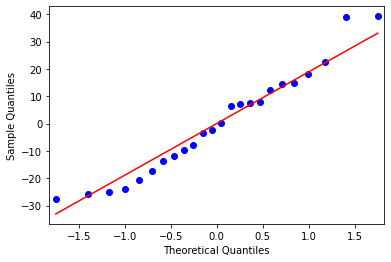

In [5]:
residual=model.resid
fig=sm.qqplot(residual,line='s')
resolution=1200
plt.savefig('normaldisresponse.pdf',bbox_inches='tight',dpi=resolution)
resolution=1200
plt.savefig('staticresponsetimeresidual.pdf',bbox_inches='tight',dpi=resolution)
plt.show()

# (ii) Shapiro Wilk Test of normality

In [6]:
from scipy.stats import shapiro
print(shapiro(model.resid))

ShapiroResult(statistic=0.9521446824073792, pvalue=0.301336407661438)


# 1.3 Checking for the second assumption of the ANOVA test(Equality of varience) - LEVENE test

In [7]:
import scipy.stats as stats
Algo_Woc =myDF['Responsetime'][myDF['Algorithms']=='Algo(WOC)']
Algo_Wic =myDF['Responsetime'][myDF['Algorithms']=='Algo(WIC)']
Algo_Cnl =myDF['Responsetime'][myDF['Algorithms']=='Algo(CNL)']


(test_static,p_value)=stats.levene(Algo_Woc,Algo_Wic,Algo_Cnl)
print('the test static is :', round(test_static,5))
print('the p-value is: ',round(p_value,5))
if p_value>0.005:
    print('There is no significace difference')
else:
    print('There is a significance difference')

the test static is : 0.45319
the p-value is:  0.64167
There is no significace difference


# 1.4 Boxplot for visualizing equivalence of mean of each catagories

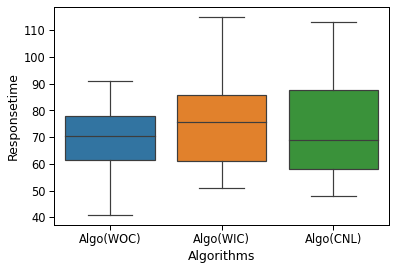

In [8]:
sns.set_context("paper",font_scale=1.3,rc={"font.size":14,"axes.titlesize":14,"axes.albelsize":14})
#plt.title("Boxplot comparing Responsetime")
sns.boxplot(x="Algorithms",y="Responsetime",data=myDF)
#plt.xlabel("Algorithms")
#plt.ylabel("Responsetime")
plt.xticks(rotation=0)
resolution=1200
plt.savefig('staticresponsetime.pdf',bbox_inches='tight',dpi=resolution)
plt.show()

# 1.5 One Way ANOVA test for significance

In [9]:
oavres=sm.stats.anova_lm(model,typ=3)

In [10]:
oavres

,sum_sq,df,F,PR(>F)
Intercept,43512.5,1.0,106.679412,1.096650e-09
Algorithms,237.0,2.0,0.290526,7.508275e-01
Residual,8565.5,21.0,NaN,NaN


# 2. Statical analysis Correctness

In [11]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mult
import seaborn as sns

In [12]:
myDF2=pd.read_csv('./Correctness.csv',sep=';')

In [13]:
myDF2

,Algorithams,Correctness
0,Algo(WOC),100
1,Algo(WOC),67
2,Algo(WOC),86
3,Algo(WOC),71
4,Algo(WOC),33
5,Algo(WOC),86
6,Algo(WOC),67
7,Algo(WOC),67
8,Algo(WIC),83
9,Algo(WIC),86


# 2.1 Fitting the model

In [14]:
model2=ols('Correctness ~ Algorithams',data=myDF2).fit()

# 2.2 Cheaking for the first assumtion of ANOVA test (Normality)

# (i) Q-Q plot for normality visualization

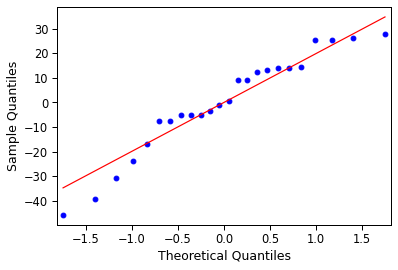

In [15]:
residual=model2.resid
fig2=sm.qqplot(residual,line='s')
resolution=1200
plt.savefig('staticcorrectnessresidual.pdf',bbox_inches='tight',dpi=resolution)
plt.show()



# (ii) Shapiro wilk test for normality

In [16]:
from scipy.stats import shapiro
print(shapiro(model2.resid))

ShapiroResult(statistic=0.9365594387054443, pvalue=0.1366729438304901)


# 2.3 Checking for the second assumption of the ANOVA test(Equality of varience) - LEVENE test

In [17]:
import scipy.stats as stats

Algo_Woc =myDF2['Correctness'][myDF2['Algorithams']=='Algo(WOC)']
Algo_Wic =myDF2['Correctness'][myDF2['Algorithams']=='Algo(WIC)']
Algo_Cnl =myDF2['Correctness'][myDF2['Algorithams']=='Algo(CNL)']

(test_static,p_value)=stats.levene(Algo_Woc,Algo_Wic,Algo_Cnl)
print('the test static is :', round(test_static,5))
print('the p-value is: ',round(p_value,5))
if p_value>0.005:
    print('There is no significace difference on correctness while using differnt style of curly brackets')
else:
    print('There is a significace difference on correctness while using differnt style of curly brackets')

the test static is : 0.05986
the p-value is:  0.94206
There is no significace difference on correctness while using differnt style of curly brackets


# 2.4 Boxplot for visualizing equivalence of mean of each catagories

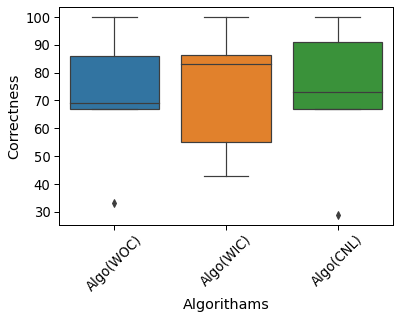

In [18]:
sns.set_context("paper",font_scale=1.5,rc={"font.size":16,"axes.titlesize":16,"axes.albelsize":16})
#plt.title("Boxplot comparing Correctness by differnt Algorithams groups(Independent veriables)")
sns.boxplot(x="Algorithams",y="Correctness",data=myDF2)
#plt.xlabel("Algorithms")
#plt.ylabel("Correctness")
plt.xticks(rotation=45)
resolution=1200
plt.savefig('staticcorrectnessboxplot.pdf',bbox_inches='tight',dpi=resolution)
plt.show()

# 2.5 One Way ANOVA test for significance

In [19]:
oavcorr=sm.stats.anova_lm(model2,typ=2)

In [20]:
oavcorr

,sum_sq,df,F,PR(>F)
Algorithams,25.75,2.0,0.028598,0.971845
Residual,9454.25,21.0,NaN,NaN


# 3. Statical Analysis Visusal attention(Average Fixation Duration in AOI's)

In [21]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mult
import seaborn as sns

In [22]:
myDF3=pd.read_csv('./Averagefixationduration.csv',sep=';')

In [23]:
myDF3

,Algorithms,FixationDurationinAOI
0,Algo(WOC),14
1,Algo(WOC),350
2,Algo(WOC),25
3,Algo(WOC),228
4,Algo(WOC),166
5,Algo(WOC),187
6,Algo(WOC),48
7,Algo(WOC),199
8,Algo(WIC),168
9,Algo(WIC),152


# 3.1 Fitting the model

In [24]:
model3=ols('FixationDurationinAOI ~ C(Algorithms)',data=myDF3).fit()

# 3.2 Cheaking for the first assumtion of ANOVA test (Normality)

# (i) Q-Q plot for normality test

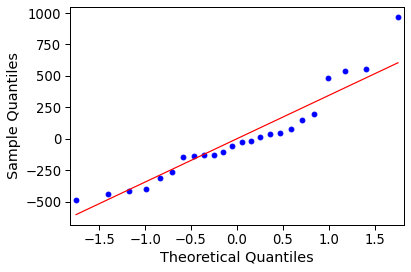

In [25]:
residual=model3.resid
fig2=sm.qqplot(residual,line='s')
resolution=1200
plt.savefig('staticfixationresidual.pdf',bbox_inches='tight',dpi=resolution)
plt.show()

# (ii) Shapiro wilk test for normality

In [26]:
from scipy.stats import shapiro
print(shapiro(model3.resid))

ShapiroResult(statistic=0.9175019264221191, pvalue=0.05144853889942169)


# (iii) Andersion darling test for normality

In [27]:
from scipy.stats import anderson
print(anderson(model3.resid))

AndersonResult(statistic=0.6865021474049016, critical_values=array([0.513, 0.584, 0.701, 0.817, 0.972]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


# 3.3 Checking for the second assumption of the ANOVA test(Equality of varience) - LEVENE test

In [28]:
import scipy.stats as stats
Algo_Woc =myDF3['FixationDurationinAOI'][myDF3['Algorithms']=='Algo(WOC)']
Algo_Wic =myDF3['FixationDurationinAOI'][myDF3['Algorithms']=='Algo(WIC)']
Algo_Cnl =myDF3['FixationDurationinAOI'][myDF3['Algorithms']=='Algo(CNL)']

(test_static,p_value)=stats.levene(Algo_Woc,Algo_Wic,Algo_Cnl)
print('the test static is :', round(test_static,5))
print('the p-value is: ',round(p_value,5))
if p_value>0.05:
    print('There is no significace difference on correctness while using differnt style of curly brackets')
else:
    print('There is a significace difference on correctness while using differnt style of curly brackets')

the test static is : 2.70195
the p-value is:  0.09032
There is no significace difference on correctness while using differnt style of curly brackets


# 3.4 Boxplot for visualizing equivalence of mean of each catagories

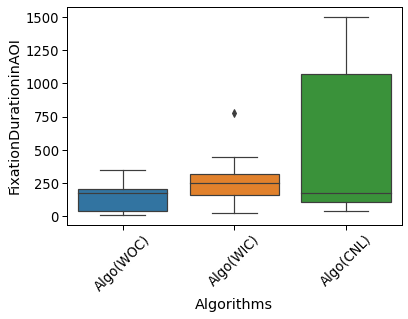

In [29]:
sns.set_context("paper",font_scale=1.5,rc={"font.size":16,"axes.titlesize":16,"axes.albelsize":16})
#plt.title("Boxplot comparing Correctness by differnt Algorithams groups(Independent veriables)")
sns.boxplot(x="Algorithms",y="FixationDurationinAOI",data=myDF3)
#plt.xlabel("Algorithms")
#plt.ylabel("Correctness")
plt.xticks(rotation=45)
resolution=1200
plt.savefig('staticfiixationboxplot.pdf',bbox_inches='tight',dpi=resolution)
plt.show()

# 3.5 One Way ANOVA test for significance

In [30]:
oavfix=sm.stats.anova_lm(model3,typ=2)

In [31]:
oavfix

,sum_sq,df,F,PR(>F)
C(Algorithms),5.870081e+05,2.0,2.156608,0.140655
Residual,2.857999e+06,21.0,NaN,NaN


In [32]:
#myNom= myDF3['Algorithms']
#myOrd = myDF3['FixationDurationinAOI']

In [33]:
#myCat1 = myNom == 'Algo(WOC)'
#myCat2 = myNom == 'Algo(WIC)'
#myCat3 = myNom == 'Algo(CNL)'

#myCat3.head()

# 3.6 Non parametric test - Kruskal test

In [34]:
Algo_Woc =myDF3['FixationDurationinAOI'][myDF3['Algorithms']=='Algo(WOC)']
Algo_Wic =myDF3['FixationDurationinAOI'][myDF3['Algorithms']=='Algo(WIC)']
Algo_Cnl =myDF3['FixationDurationinAOI'][myDF3['Algorithms']=='Algo(CNL)']

In [35]:
from scipy.stats import kruskal

In [36]:
kruskal(Algo_Woc,Algo_Wic,Algo_Cnl)

KruskalResult(statistic=2.0450000000000017, pvalue=0.35969457874337074)

# 4. Outlier detector for section 3


In [37]:
max_threshold=myDF3['FixationDurationinAOI'].quantile(0.95)
max_threshold

1082.3

In [38]:
myDF3[myDF3['FixationDurationinAOI']>max_threshold]

,Algorithms,FixationDurationinAOI
19,Algo(CNL),1085
22,Algo(CNL),1500


In [39]:
min_threshold=myDF3['FixationDurationinAOI'].quantile(0.05)
min_threshold

25.6

In [40]:
myDF3[myDF3['FixationDurationinAOI']<min_threshold]

,Algorithms,FixationDurationinAOI
0,Algo(WOC),14
2,Algo(WOC),25


In [41]:
myDf4= myDF3[(myDF3['FixationDurationinAOI']<max_threshold) & (myDF3['FixationDurationinAOI']>min_threshold)]

In [42]:
myDf4

,Algorithms,FixationDurationinAOI
1,Algo(WOC),350
3,Algo(WOC),228
4,Algo(WOC),166
5,Algo(WOC),187
6,Algo(WOC),48
7,Algo(WOC),199
8,Algo(WIC),168
9,Algo(WIC),152
10,Algo(WIC),278
11,Algo(WIC),778


# 4.1 Fitting the model

In [43]:
model4=ols('FixationDurationinAOI ~ C(Algorithms)',data=myDf4).fit()

# Anova test 

In [44]:
oavfix2=sm.stats.anova_lm(model4,typ=2)

In [45]:
oavfix2

,sum_sq,df,F,PR(>F)
C(Algorithms),3.547349e+04,2.0,0.25562,0.77736
Residual,1.179584e+06,17.0,NaN,NaN
